# Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(1)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0


In [3]:
df.shape

(90, 18)

In [33]:
df = df.assign(Result = df['Class'].map({1:'Success', 0:'Failure'}))

## Plots (1-6)

### Payload vs Flight Number

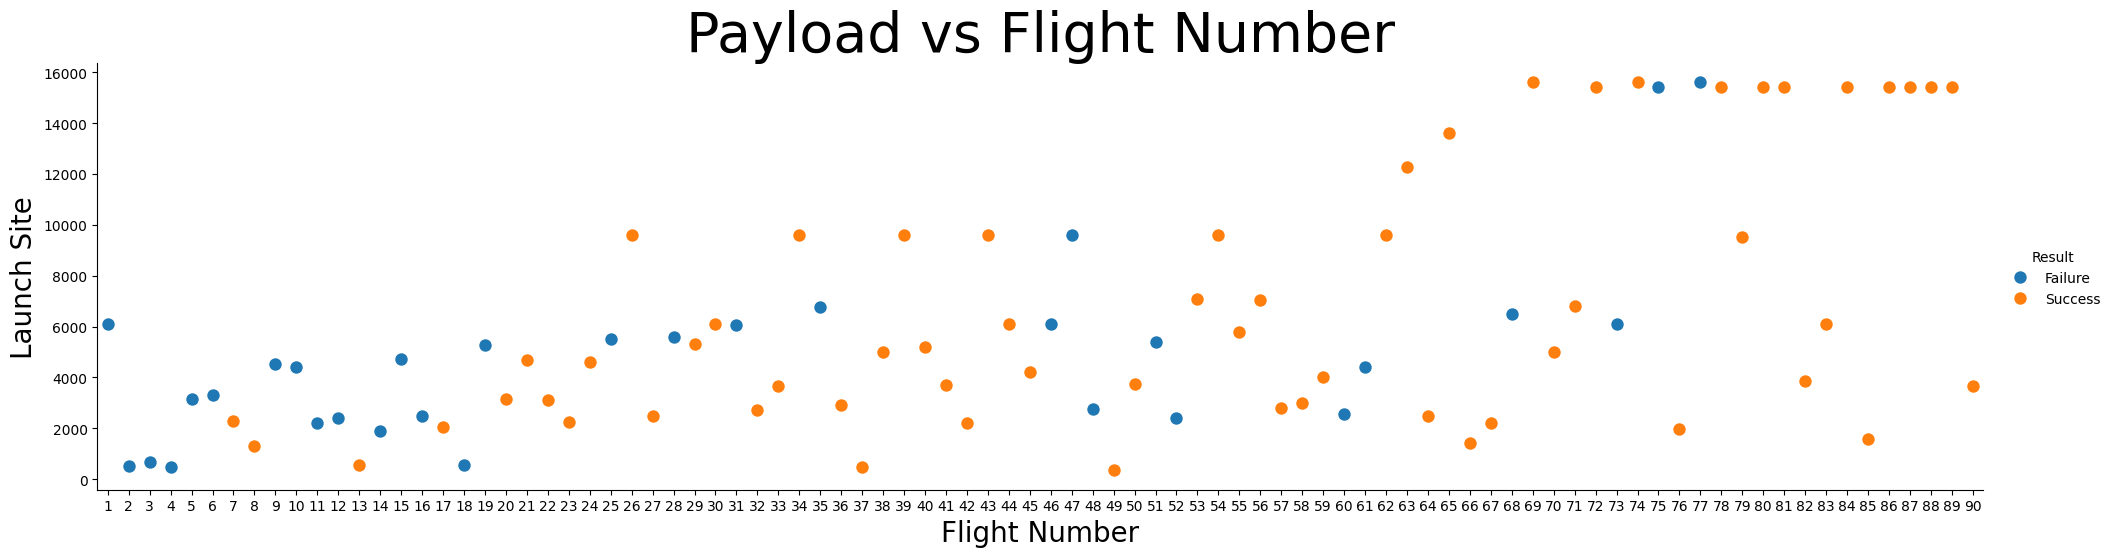

In [37]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Result", data=df, s=80, aspect = 4)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Pay load Mass (kg)", fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.title("Payload vs Flight Number",fontsize=40)
plt.show()

### Flight Number vs Launch Site (TASK 1)

<Figure size 800x300 with 0 Axes>

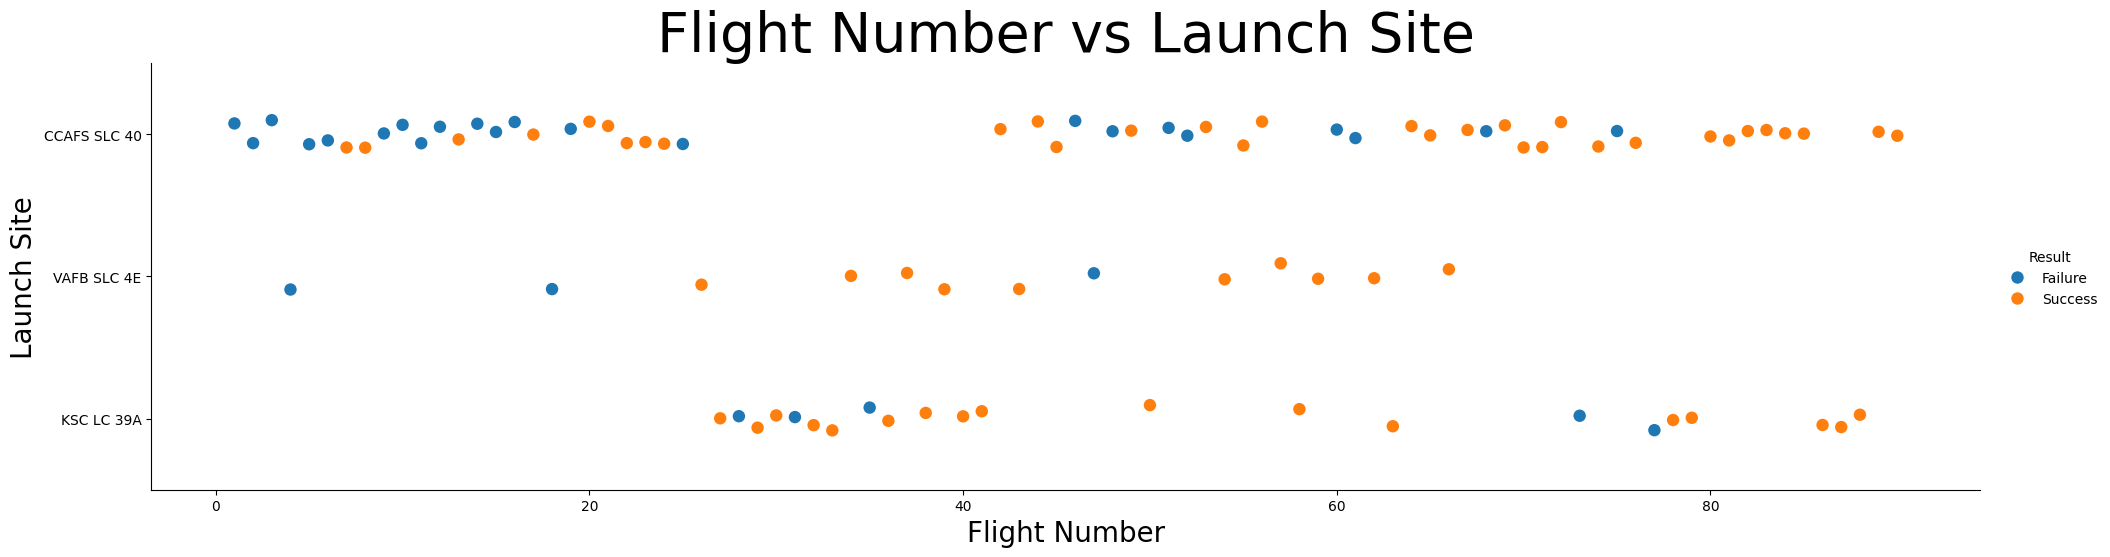

In [38]:
plt.figure(figsize=(8,3))
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Result", data=df, s=80, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.title("Flight Number vs Launch Site",fontsize=40)
plt.show()

### Payload vs Launch Site (TASK 2)

<Figure size 800x300 with 0 Axes>

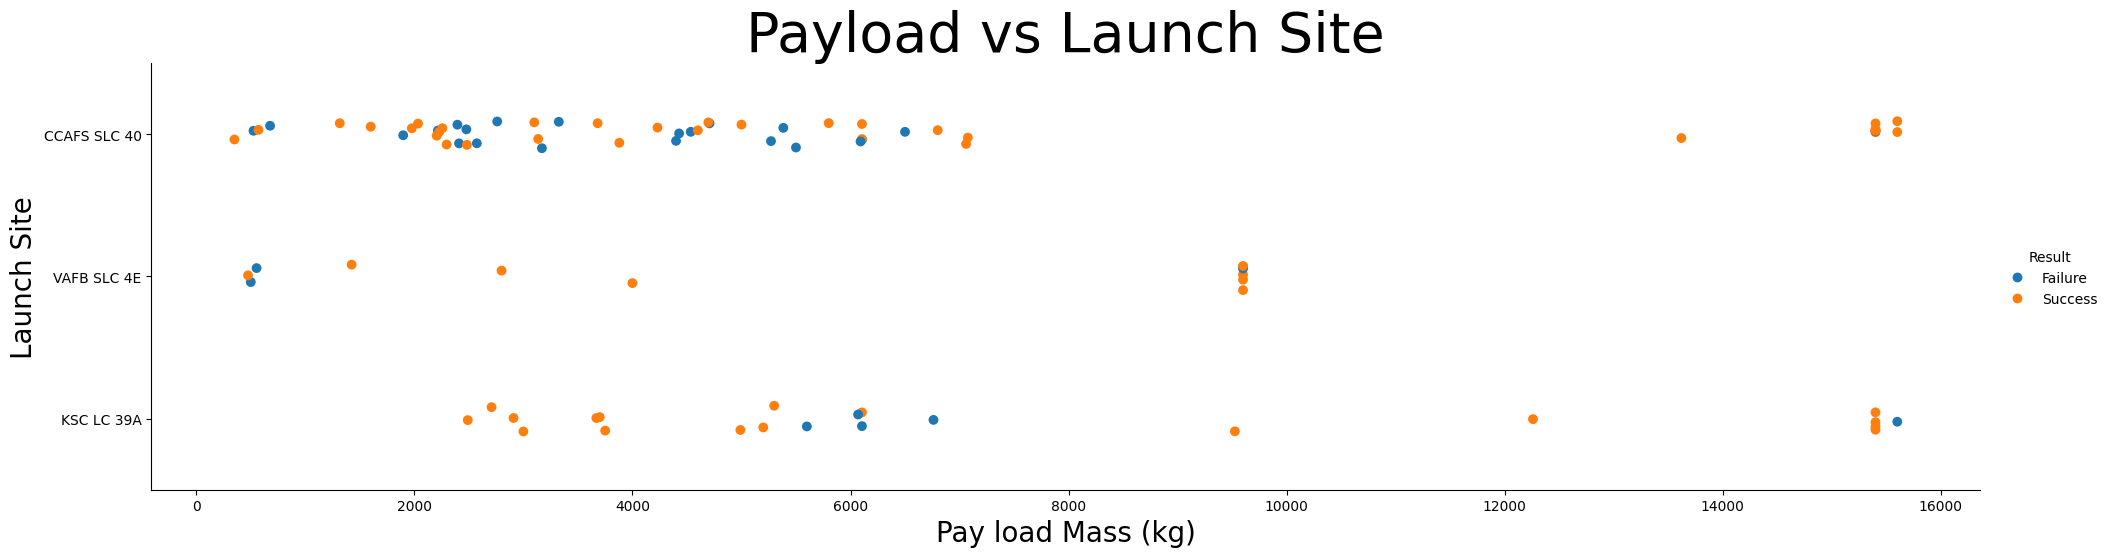

In [39]:
plt.figure(figsize=(8,3))
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Result", data=df, s=50, aspect = 4)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.title("Payload vs Launch Site",fontsize=40)
plt.show()

### Success Rate vs Orbit Type (TASK 3)

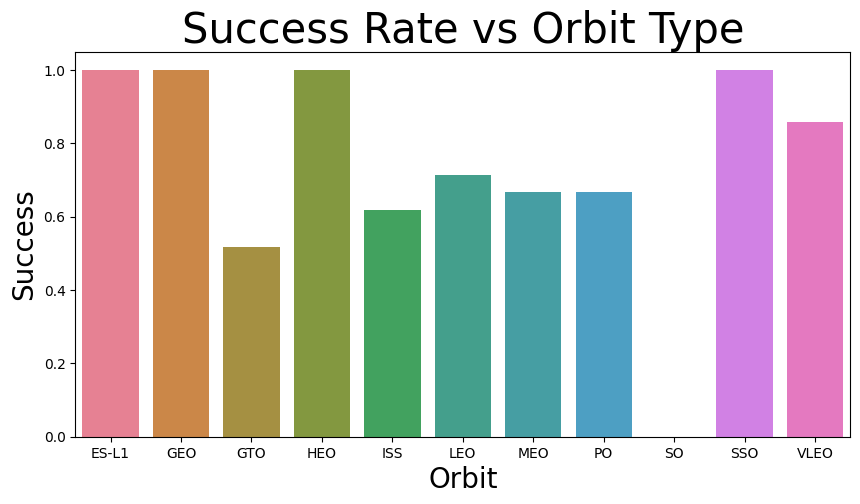

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x='Orbit', y='Class', hue='Orbit',  data=df.groupby('Orbit')['Class'].mean().reset_index())
plt.xlabel('Orbit',fontsize=20)
plt.ylabel('Success',fontsize=20)
plt.title('Success Rate vs Orbit Type',fontsize=30)
plt.show()

### Flight Number vs Orbit Type (TASK 4)

<Figure size 800x300 with 0 Axes>

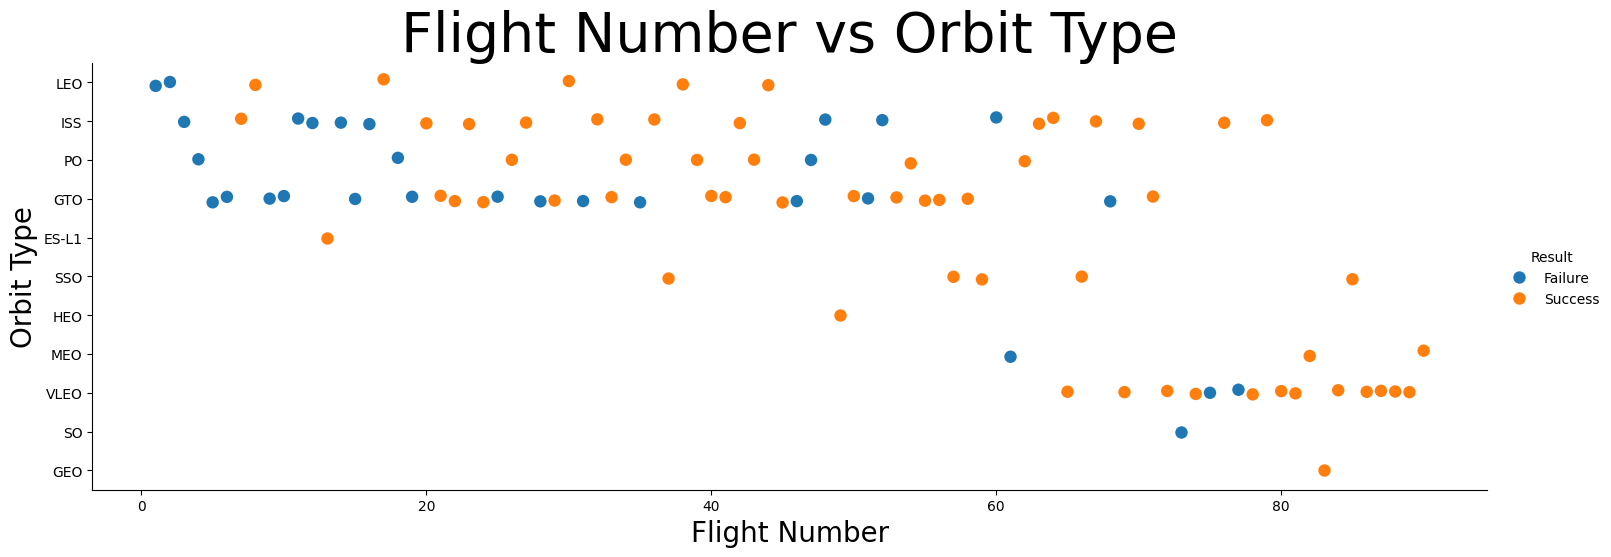

In [51]:
plt.figure(figsize=(8,3))
sns.catplot(y="Orbit", x="FlightNumber", hue="Result", data=df, s = 80, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.title("Flight Number vs Orbit Type",fontsize=40)
plt.show()

### Orbit Type by Payload (TASK 5)

<Figure size 800x300 with 0 Axes>

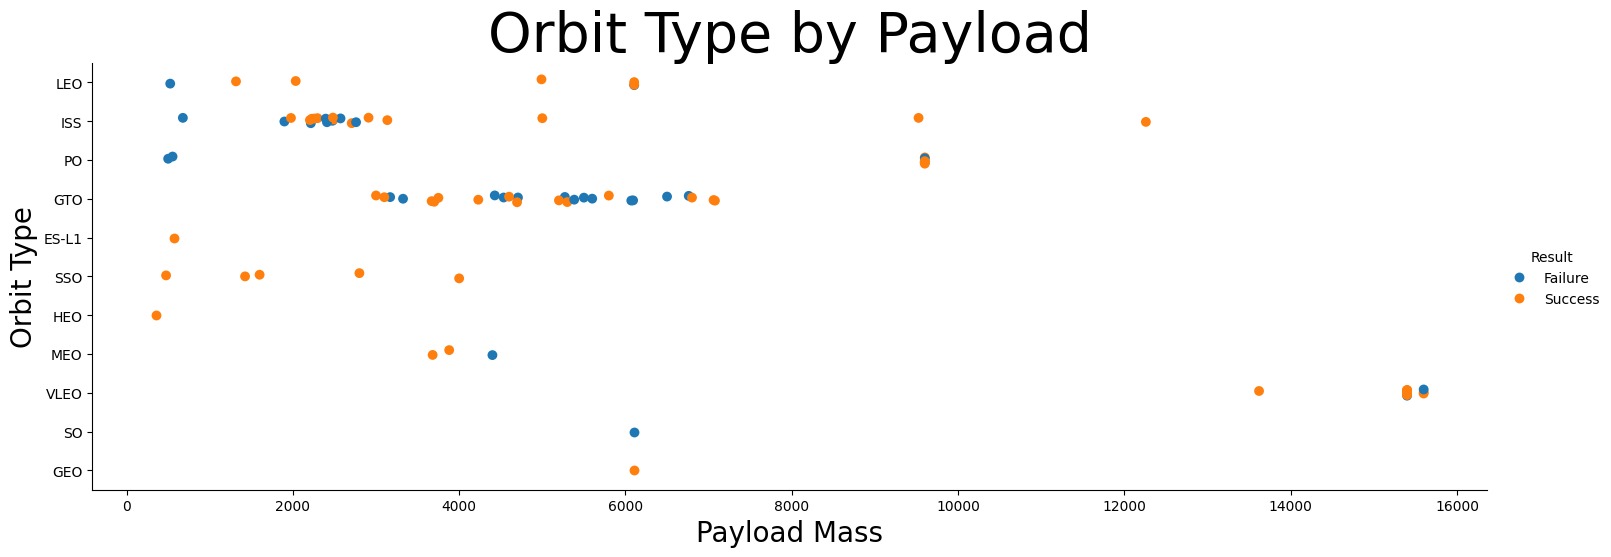

In [53]:
plt.figure(figsize=(8,3))
sns.catplot(y="Orbit", x="PayloadMass", hue="Result", data=df, s=50, aspect = 3)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.title("Orbit Type by Payload",fontsize=40)
plt.show()

### Launch Success Yearly Trend (TASK 6)

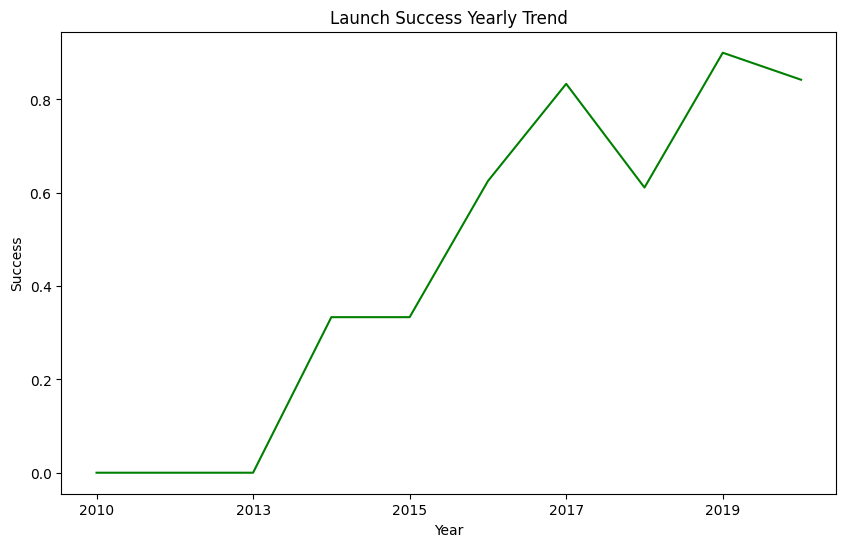

In [54]:
df_line = pd.DataFrame()
df_line = df_line.assign(Year = df.Date.apply(lambda x: x[:x.find('-')]))
df_line = df_line.assign(Success = df.Class)
df_line = df_line.groupby(['Year'])['Success'].mean()

plt.figure(figsize=(10,6))
df_line.plot(kind='line', color='green')
plt.xlabel('Year')
plt.ylabel('Success')
plt.title('Launch Success Yearly Trend')
plt.show()

## Features Dataset

In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head(1)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003


### Numerically Categorize (TASK 7)

In [13]:
features_one_hot = pd.get_dummies(data=features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head(1)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
features_one_hot.shape

(90, 80)

In [15]:
features_one_hot.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056       bool
Serial_B1058       bool
Serial_B1059       bool
Serial_B1060       bool
Serial_B1062       bool
Length: 80, dtype: object

### Cast all numeric columns to `float64` (TASK  8)

In [16]:
features_one_hot = features_one_hot.astype(float)

In [17]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

## Save Data to CSV File

In [18]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [27]:
df = df.assign(Result = df['Class'].map({1:'Success', 0:'Failure'}))

In [28]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Result
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,Failure
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,Failure
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,Failure
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,Failure
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,Failure


In [ ]:
df_line = pd.DataFrame()
df_line = df_line.assign(Year = df.Date.apply(lambda x: x[:x.find('-')]))
df_line = df_line.assign(Success = df.Class)
df_line = df_line.groupby(['Year'])['Success'].mean()

plt.figure(figsize=(10,3))
df_line.plot(kind='line', color='green')
plt.xlabel('Year')
plt.ylabel('Success')
plt.title('Success by Year')
plt.show()

<Figure size 700x500 with 0 Axes>

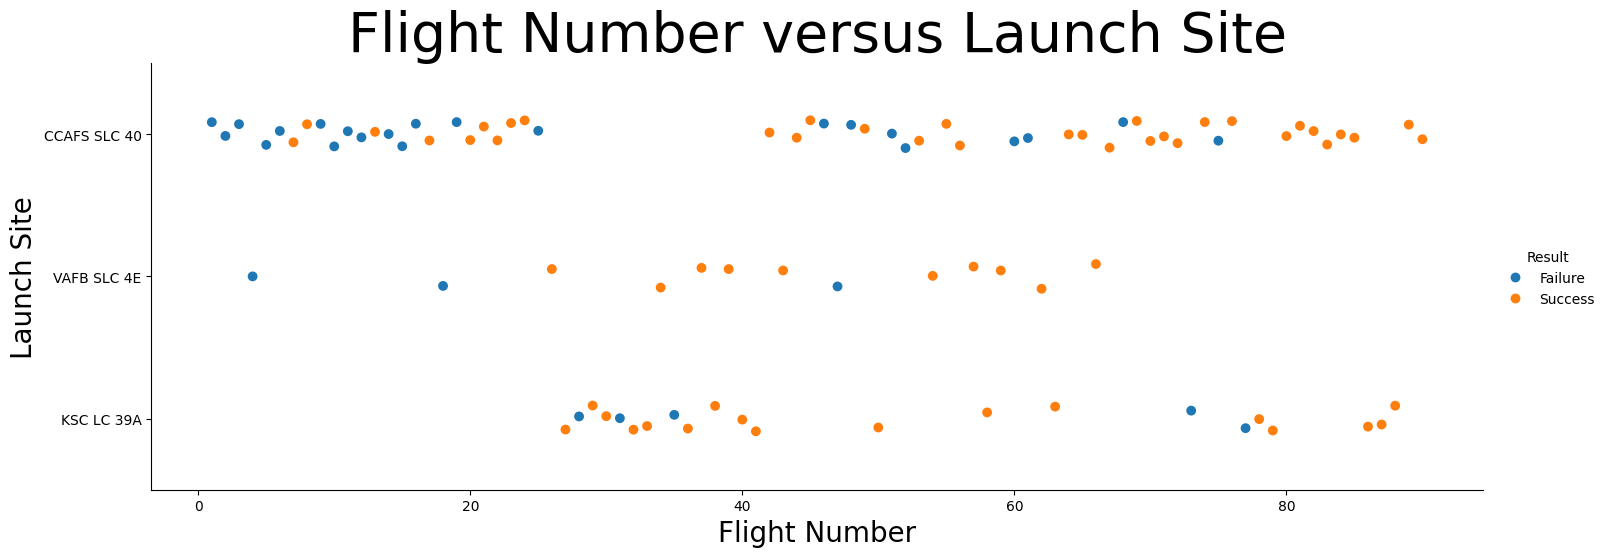

In [31]:
plt.figure(figsize=(7,5))
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Result", data=df, s=50, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.title("Flight Number versus Launch Site", fontsize=40)
plt.show()